# Глубинное обучение, ИИ ВШЭ

## Домашнее задание 1. Полносвязные нейронные сети. 

### Общая информация

### Оценивание и штрафы

Максимально допустимая оценка за работу без бонусов — 10 баллов. Сдавать задание после указанного срока жесткого дедлайна нельзя.

Сдача работы после мягкого дедлайна штрафуется ступенчато, -1 балл в сутки. Один раз за модуль студентам предоставляется возможность использовать отсрочку и сдать в жесткий дедлайн без штрафа.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке. Также оценка может быть снижена за плохо читаемый код и плохо оформленные графики. Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

Использование генеративных моделей допустимо на следующих условиях:
- Количество кода, написанное генеративными моделями, не превышает 30%
- Указана модель, использованная для генерации, а также промпт
- В конце работы необходимо описать свой опыт использования генеративного ИИ для решения данного домашнего задания. Укажите как часто Вам приходилось исправлять код своими руками или просить модель что-то исправить. Было ли это быстрее, чем написать код самим? 

В случае невыполнения этих требований работа не оценивается и оценка за неё не превышает 0 баллов.

### О задании

В этом задании вам предстоит обучить полносвязную нейронную сеть для предсказания года выпуска песни по ее аудио-признакам. Для этого мы будем использовать [Million Songs Dataset](https://samyzaf.com/ML/song_year/song_year.html).

In [183]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch
from IPython.display import clear_output
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm

plt.rcParams.update({"font.size": 16})
sns.set_style("whitegrid")
np.random.seed(0xFA1AFE1)

Начнем с того, что скачаем и загрузим данные:

In [ ]:
# !wget -O data.txt.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip

In [184]:
df = pd.read_csv("C:\\Users\\ksbal\\Desktop\\hw1\\YearPredictionMSD.txt", header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515340,2006,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,...,4.81440,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052
515341,2006,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,...,32.38589,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815
515342,2006,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,...,-18.73598,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364
515343,2006,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,...,67.16763,282.77624,-4.63677,144.00125,21.62652,-29.72432,71.47198,20.32240,14.83107,39.74909


Посмотрим на статистики по данным.

In [188]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,1998.397082,43.387126,1.289554,8.658347,1.164124,-6.553601,-9.521975,-2.391089,-1.793236,3.727876,...,15.755406,-73.461500,41.542422,37.934119,0.315751,17.669213,-26.315336,4.458641,20.035136,1.329105
std,10.931046,6.067558,51.580351,35.268585,16.322790,22.860785,12.857751,14.571873,7.963827,10.582861,...,32.099635,175.618889,122.228799,95.050631,16.161764,114.427905,173.977336,13.346557,185.558247,22.088576
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,1994.000000,39.954690,-26.059520,-11.462710,-8.487500,-20.666450,-18.440990,-10.780600,-6.468420,-2.293660,...,-1.812650,-139.555160,-20.986900,-4.669540,-6.781590,-31.580610,-101.530300,-2.566090,-59.509270,-8.820210
50%,2002.000000,44.258500,8.417850,10.476320,-0.652840,-6.007770,-11.188390,-2.046670,-1.736450,3.822310,...,9.171850,-53.090060,28.791060,33.623630,0.820840,15.598470,-21.204120,3.117640,7.759730,0.053050
75%,2006.000000,47.833890,36.124010,29.764820,8.787540,7.741870,-2.388960,6.508580,2.913450,9.961820,...,26.274480,13.478730,89.661770,77.785800,8.470990,67.794960,52.389330,9.967740,86.351610,9.679520
max,2011.000000,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


Целевая переменная, год выпуска песни, записана в первом столбце. Посмотрим на ее распределение.

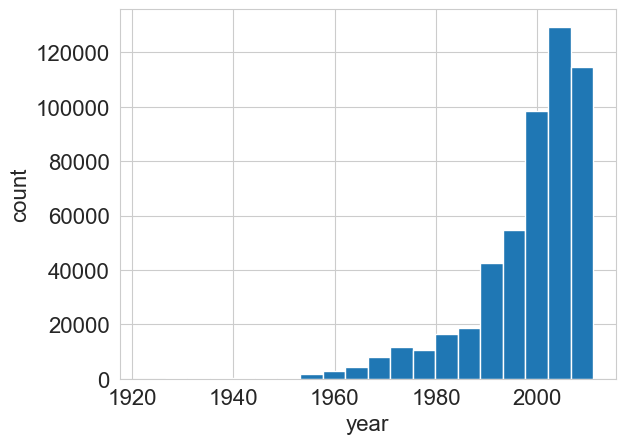

Range: 1922 - 2011
Unique values: 89


In [189]:
plt.hist(df.iloc[:, 0], bins=20)
plt.xlabel("year")
plt.ylabel("count")
plt.show()
print(f"Range: {df.iloc[:, 0].min()} - {df.iloc[:, 0].max()}")
print(f"Unique values: {np.unique(df.iloc[:, 0]).size}")

Разобьем данные на обучение и тест (не меняйте здесь ничего, чтобы сплит был одинаковым у всех).

In [194]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

train_size = int(0.75 * X.shape[0])
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]
X_train.shape, X_test.shape

((386508, 90), (128837, 90))

**Задание 0 (0 баллов, но при невыполнении максимальная оценка за всю работу &mdash; 0 баллов).** Мы будем использовать MSE как метрику качества. Прежде чем обучать нейронные сети, нам нужно проверить несколько простых бейзлайнов, чтобы было с чем сравнить более сложные алгоритмы. Для этого бучите `Ridge` регрессию из `sklearn`. Кроме того, посчитайте качество при наилучшем константном прогнозе (также пропишите текстом, какая константа будет лучшей для MSE).

In [195]:
#Обучаем модель
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)

#Предсказываем и считаем метрику качества
y_pred_ridge = clf.predict(X_test)
mse_ridge = mse(y_test, y_pred_ridge)
print(f"MSE = {mse_ridge:.2f}")

MSE = 89.75


Теперь посчитаем качество при наилучшем константном прогнозе. Лучшая константа для MSE - это среднее значение целевой переменной

In [196]:
beast_constant = y_test.mean()
y_pred_constant = beast_constant * np.ones_like(y_test) #Умножаем на единичный массив для нужной размерности
mse_constant = mse(y_test, y_pred_constant)
print(f"Наилучшая константа = {int(beast_constant)}")
print(f"MSE (beast_constant) = {mse_constant:.2f}")

Наилучшая константа = 1998
MSE (beast_constant) = 117.62


**Ответ:** Лучшая константа для MSE - это значение целеввой переменной = '1998' (год округляем по правилу математики)

 ==> Лучшее качество метрики у нас показывает при Ridge регрессии

Теперь приступим к экспериментам с нейросетями. Для начала отделим от данных валидацию:

In [197]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=0xE2E4
)
X_train.shape, X_val.shape

((289881, 90), (96627, 90))

## Глава I. Заводим нейронную сеть (5 баллов)

**Задание 1.1 (0.5 баллов).** Заполните пропуски в функции `train_and_validate`. Она поможет нам запускать эксперименты. Можете также реализовать поддержку обучения на GPU, чтобы эксперименты считались быстрее. Бесплатно воспользоваться GPU можно на сервисах **Google Colab** и **Kaggle**.

In [198]:
def plot_losses(train_losses, train_metrics, val_losses, val_metrics):
    """
    Plot losses and metrics while training
      - train_losses: sequence of train losses
      - train_metrics: sequence of train MSE values
      - val_losses: sequence of validation losses
      - val_metrics: sequence of validation MSE values
    """
    clear_output(wait=True)
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].plot(range(1, len(train_losses) + 1), train_losses, label="train")
    axs[0].plot(range(1, len(val_losses) + 1), val_losses, label="val")
    axs[1].plot(range(1, len(train_metrics) + 1), train_metrics, label="train")
    axs[1].plot(range(1, len(val_metrics) + 1), val_metrics, label="val")

    if max(train_losses) / min(train_losses) > 10:
        axs[0].set_yscale("log")

    if max(train_metrics) / min(train_metrics) > 10:
        axs[0].set_yscale("log")

    for ax in axs:
        ax.set_xlabel("epoch")
        ax.legend()

    axs[0].set_ylabel("loss")
    axs[1].set_ylabel("MSE")
    plt.show()

In [199]:
def train_and_validate(
    model,
    optimizer,
    criterion,
    metric,
    train_loader,
    val_loader,
    num_epochs,
    verbose=True,
):
    """
    Train and validate neural network
      - model: neural network to train
      - optimizer: optimizer chained to a model
      - criterion: loss function class
      - metric: function to measure MSE taking neural networks predictions
                 and ground truth labels
      - train_loader: DataLoader with train set
      - val_loader: DataLoader with validation set
      - num_epochs: number of epochs to train
      - verbose: whether to plot metrics during training
    Returns:
      - train_mse: training MSE over the last epoch
      - val_mse: validation MSE after the last epoch
    """
    #Перенос модели на устройство (CPU или GPU)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    
    train_losses, val_losses = [], []
    train_metrics, val_metrics = [], []

    for epoch in tqdm(range(1, num_epochs + 1)):
        model.train()
        running_loss, running_metric = 0, 0
        # pbar = (
        #     tqdm(train_loader, desc=f"Training {epoch}/{num_epochs}")
        #     if verbose
        #     else train_loader
        # )

        for i, (X_batch, y_batch) in enumerate(train_loader, 1):
            #Перенос данных на устройство
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            predictions = model(X_batch)
            loss = criterion(predictions, y_batch)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            #Вычисление метрики
            with torch.no_grad():
                metric_value = metric(predictions, y_batch)
                if type(metric_value) == torch.Tensor:
                    metric_value = metric_value.item()
                running_loss += loss.item() * X_batch.shape[0]
                running_metric += metric_value * X_batch.shape[0]

            if verbose and i % 100 == 0:
                print(f"Training epoch {epoch}/{num_epochs}, batch {i}: loss={loss.item():.4f}, MSE={metric_value:.4f}")

        train_losses.append(running_loss / len(train_loader.dataset))
        train_metrics.append(running_metric / len(train_loader.dataset))

        model.eval()
        running_loss, running_metric = 0, 0
        # pbar = (
        #     tqdm(val_loader, desc=f"Validating {epoch}/{num_epochs}")
        #     if verbose
        #     else val_loader
        # )

        for i, (X_batch, y_batch) in enumerate(val_loader, 1):
            with torch.no_grad():
                predictions = model(X_batch)
                loss = criterion(predictions, y_batch)

                metric_value = metric(predictions, y_batch)
                if type(metric_value) == torch.Tensor:
                    metric_value = metric_value.item()
                running_loss += loss.item() * X_batch.shape[0]
                running_metric += metric_value * X_batch.shape[0]

            if verbose and i % 100 == 0:
                print(f"Validating epoch {epoch}/{num_epochs}, batch {i}: loss={loss.item():.4f}, MSE={metric_value:.4f}")

        val_losses.append(running_loss / len(val_loader.dataset))
        val_metrics.append(running_metric / len(val_loader.dataset))

        if verbose:
            plot_losses(train_losses, train_metrics, val_losses, val_metrics)

    if verbose:
        print(f"Validation MSE: {val_metrics[-1]:.3f}")

    return train_metrics[-1], val_metrics[-1]

**Задание 1.2 (0.75 балла).** Попробуем обучить нашу первую нейронную сеть. Здесь целевая переменная дискретная &mdash; это год выпуска песни. Поэтому будем учить сеть на классификацию c помощью [кросс-энтропийной функции потерь](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html).

- В качестве архитектуры сети возьмите два линейных слоя с активацией ReLU между ними c числом скрытых нейронов, равным 128.
- Используйте SGD с `lr=1e-2`.
- Возьмите размер мини-батча около 32-64, примерно 3-4 эпох обучения должно быть достаточно.
- Скорее всего вам пригодится `torch.utils.data.TensorDataset`. Когда будете конвертировать numpy-массивы в torch-тензоры, используйте тип `torch.float32`.
- Также преобразуйте целевую переменную так, чтобы ее значения принимали значения от $0$ до $C-1$, где $C$ &mdash; число классов (лучше передайте преобразованное значение в TensorDataset, исходное нам еще пригодится)
- В качестве параметра `metric` в `train_and_validate` передайте lambda-выражение, которое считает MSE по выходу нейронной сети и целевой переменной. В случае классификации предсказывается класс с наибольшей вероятностью (или, что то же самое, с наибольшим значением **логита**$^1$).

$^1$ **Логит** &mdash; выход последнего линейного слоя, может принимать любые вещественные значения. Если применить Softmax к логитам, то получатся вероятности распределения классов.

In [200]:
#Было
y_train

array([2001, 1996, 2009, ..., 2003, 1977, 1999], shape=(289881,))

In [201]:
#Сначала преобразуем целевую переменную в значении от 0 до С-1
unique_years = np.unique(np.concatenate([y_train, y_val]))
year_to_class = {year: idx for idx, year in enumerate(unique_years)}

#Стало
y_train = np.array([year_to_class[year] for year in y_train])
y_val = np.array([year_to_class[year] for year in y_val])
y_train

array([78, 73, 86, ..., 80, 54, 76], shape=(289881,))

In [202]:
#Конвентируем numpy-массивы в torch-тензоры
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)

print(X_train, y_train, sep="\n\n")

[[  50.31409   42.06222   16.1595  ...    2.23454  171.80032  -10.22375]
 [  40.61298   54.00535  -37.72004 ...   23.156     83.29221   26.74803]
 [  48.17443    4.1059    -8.68111 ...   15.36454  -82.12546   -6.18005]
 ...
 [  42.14289 -112.3676    44.08426 ...   30.86184  275.56018  -37.19224]
 [  39.72216   10.5722     0.36874 ...    9.22143   56.32265    9.99673]
 [  46.4015    24.30116   41.39422 ...   16.63969    6.16009    7.86706]]

[78 73 86 ... 80 54 76]


In [203]:
#Создание TensorDataset и DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [204]:
#Проверка
train_dataset

In [205]:
#Проверка
train_loader

In [206]:
#Определение модели
class SimpleNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [207]:
"""
input_size - размерность входных данных
hidden_size - число скрытых нейронов
num_classes - число классов (уникальных годов, найденных раннее)
"""
model = SimpleNet(input_size=X_train.shape[1], hidden_size=128, num_classes=len(unique_years))

In [208]:
#SGD с lr=1e-2
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
criterion = nn.CrossEntropyLoss()

Также нужно реализовать mse для классификиции

In [209]:
def mse_metric(predictions, targets):
    preds = predictions.argmax(dim=1)  
    return ((preds - targets) ** 2).float().mean()

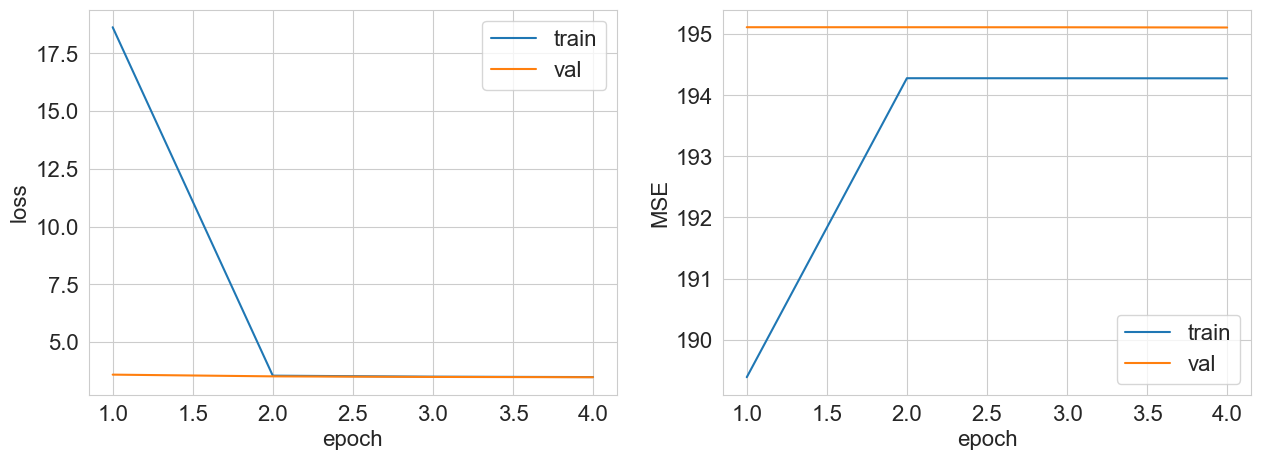

100%|██████████| 4/4 [00:26<00:00,  6.55s/it]

Validation MSE: 195.108


In [210]:
#Собираем все вместе

# Обучение модели
train_mse, val_mse = train_and_validate(
    model=model,
    optimizer=optimizer,
    criterion=criterion,
    metric=lambda pred, true: mse_metric(pred, true),
    train_loader=train_loader,
    val_loader=val_loader,
    num_epochs=4,
    verbose=True
)

# Вывод результатов
# print(f"MSE для train: {train_mse:.3f}")
# print(f"MSE для val: {val_mse:.3f}")

**Задание 1.3 (0.5 балла).** Прокомментируйте ваши наблюдения. Удалось ли побить бейзлайн? Как вы думаете, хорошая ли идея учить классификатор для этой задачи? Почему?

**Ответ** \
**Посмотрим на графики:**\
График потерь показывает, что обучающая ошибка сходится после нескольких эпох\
График метрик показывает стабильную ситуацию для val, а train увеличивается резко на 2 эпохе.\
Ridge регрессия по прежнему является лучшей. Нейросеть хуже, чем наилучший константный прогноз.

Я думаю, что учить классификатор для этой задачи - плохая идея тк у нас все же задача регрессии. Наша целевая переменная - это год выпуска песни. Год является непрерывной величиной, а это типичная задача регрессии

**Задание 1.4 (0.75 балла).** Теперь попробуем решать задачу как регрессию. Обучите нейронную сеть на [MSE](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html).

- Используйте такие же гиперпараметры обучения.
- Когда передаете целевую переменную в TensorDataset, сделайте reshape в (-1, 1).
- Не забудьте изменить lambda-выражение, которые вы передаете в `train_and_validate`.
- Если что-то пойдет не так, можете попробовать меньшие значения `lr`.

In [211]:
#torch-тензоры
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)

X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).reshape(-1, 1)

In [212]:
X_train_tensor

tensor([[  50.3141,   42.0622,   16.1595,  ...,    2.2345,  171.8003,
          -10.2238],
        [  40.6130,   54.0053,  -37.7200,  ...,   23.1560,   83.2922,
           26.7480],
        [  48.1744,    4.1059,   -8.6811,  ...,   15.3645,  -82.1255,
           -6.1800],
        ...,
        [  42.1429, -112.3676,   44.0843,  ...,   30.8618,  275.5602,
          -37.1922],
        [  39.7222,   10.5722,    0.3687,  ...,    9.2214,   56.3227,
            9.9967],
        [  46.4015,   24.3012,   41.3942,  ...,   16.6397,    6.1601,
            7.8671]])

In [213]:
y_train_tensor

tensor([[78.],
        [73.],
        [86.],
        ...,
        [80.],
        [54.],
        [76.]])

In [214]:
#Создание TensorDataset и DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [215]:
#Определение модели
class Regressor(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Regressor, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, 1)  

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [216]:
model = Regressor(input_size=X_train.shape[1], hidden_size=128)

In [217]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-6) 
criterion = nn.MSELoss()

In [218]:
def mse_metric(predictions, targets):
    return ((predictions - targets) ** 2).mean()

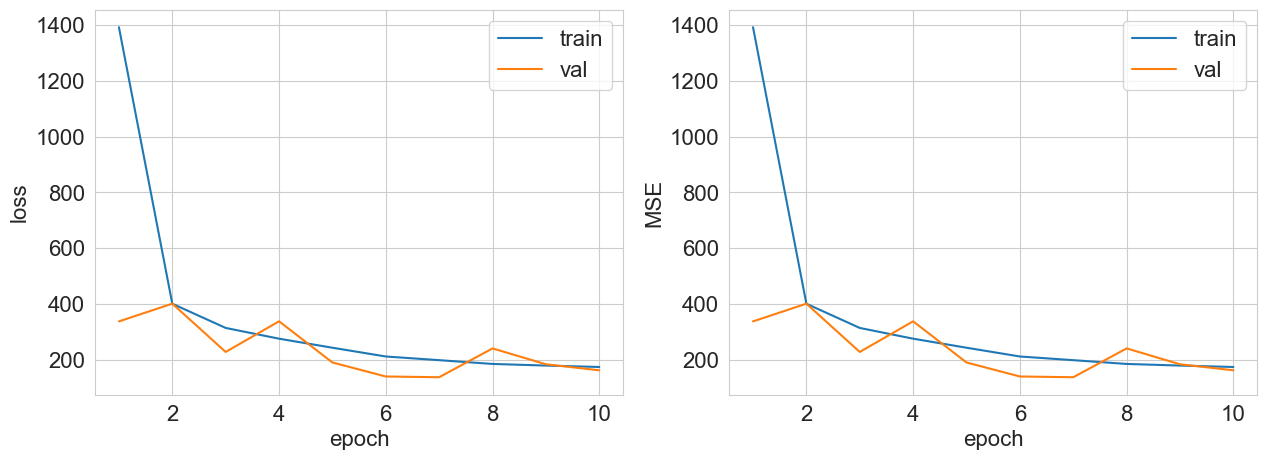

100%|██████████| 10/10 [00:56<00:00,  5.69s/it]

Validation MSE: 162.436


In [219]:
# Обучение модели
train_mse, val_mse = train_and_validate(
    model=model,
    optimizer=optimizer,
    criterion=criterion,
    metric=lambda pred, true: mse_metric(pred, true),
    train_loader=train_loader,
    val_loader=val_loader,
    num_epochs=10,
    verbose=True
)

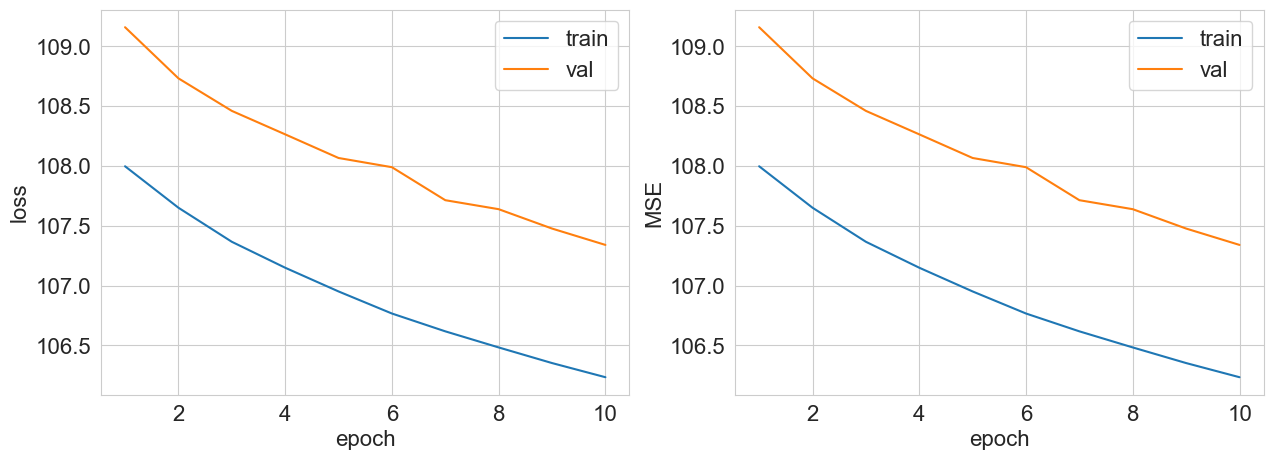

100%|██████████| 10/10 [00:56<00:00,  5.61s/it]

Validation MSE: 107.340


In [221]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-8) 
criterion = nn.MSELoss()

train_mse, val_mse = train_and_validate(
    model=model,
    optimizer=optimizer,
    criterion=criterion,
    metric=lambda pred, true: mse_metric(pred, true),
    train_loader=train_loader,
    val_loader=val_loader,
    num_epochs=10,
    verbose=True
)

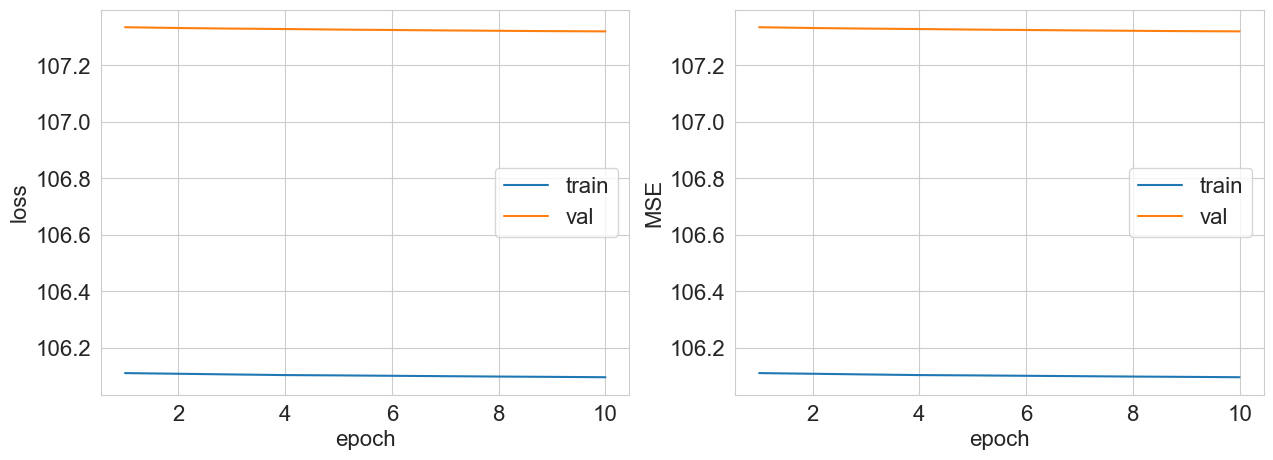

100%|██████████| 10/10 [00:57<00:00,  5.72s/it]

Validation MSE: 107.321


In [222]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-10) 
criterion = nn.MSELoss()

train_mse, val_mse = train_and_validate(
    model=model,
    optimizer=optimizer,
    criterion=criterion,
    metric=lambda pred, true: mse_metric(pred, true),
    train_loader=train_loader,
    val_loader=val_loader,
    num_epochs=10,
    verbose=True
)

**Задание 1.5 (0.5 балла).** Получилось ли у вас стабилизировать обучение? Помогли ли меньшие значения `lr`? Стало ли лучше от замены классификации на регрессию? Как вы думаете, почему так происходит? В качестве подсказки можете посмотреть на распределение целевой переменной и магнитуду значений признаков.

**Ответ:** Я поставила значение эпох 10 и меняла значение lr. Выше 1e-6 были nan значения. \
При lr=1e-6 графики val имеют резкие скачки, что гофорит о нестабильности обучения, плэтому уменьшаем значение\
При lr=1e-8 обучение становится более стабильным. Потери и MSE снижаются плавно, без резких скачков, но скорость обучения замедляется\
При lr=1e-10 обучение практически остановилось, потери и MSE почти не меняются после нескольких эпох.\
Из всего выше следует, что оптимальным значением является lr=1e-8. При этом, значение MSE при переходе от классификации на регрессию стало намного лучше. Было 195.116, стало 108.162. Также это значение лучше лучшей константы для MSE, значение которого было равно 117.62

При изменении lr значение становится лучше тк при большом значении (1e-6) модель может перескакивать через минимум, что приводит к нестабильному обучению. А если lr слишком мал (1e-10), модель будет двигаться слишком медленно и процесс обучения практически остановится. \
Можно посмотреть на еще один пример, где lr=1e-8 и количество эпох будет 4

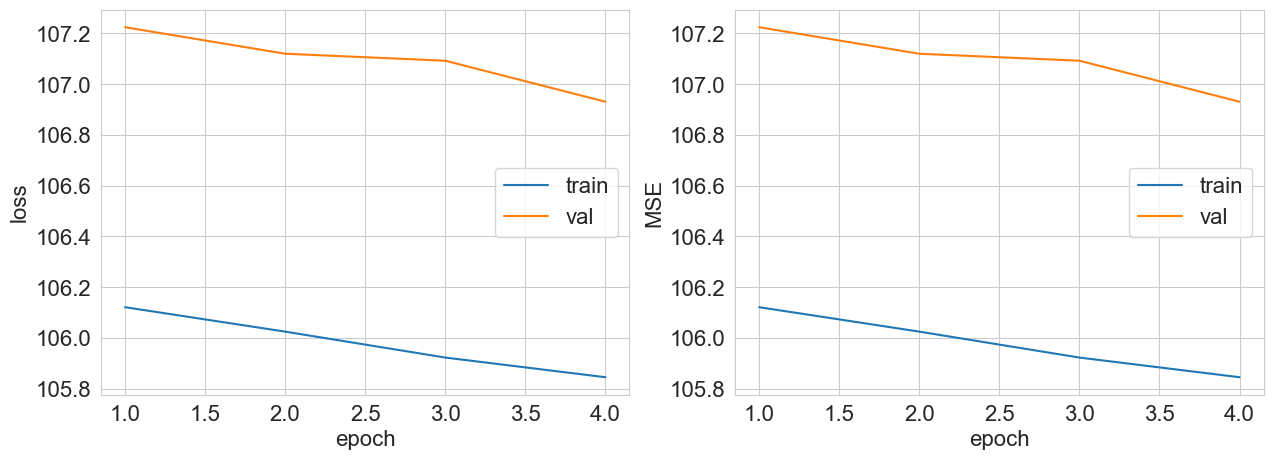

100%|██████████| 4/4 [00:22<00:00,  5.55s/it]

Validation MSE: 106.931


In [223]:
#Посмотрим на одинаковое кол-во эпох (класс. и регрессии) при lr=1e-8
optimizer = torch.optim.SGD(model.parameters(), lr=1e-8) 
criterion = nn.MSELoss()

train_mse, val_mse = train_and_validate(
    model=model,
    optimizer=optimizer,
    criterion=criterion,
    metric=lambda pred, true: mse_metric(pred, true),
    train_loader=train_loader,
    val_loader=val_loader,
    num_epochs=4,
    verbose=True
)

**Задание 1.6 (0.75 балла).** Начнем с того, что попробуем отнормировать целевую переменную. Для этого воспользуемся min-max нормализацией, чтобы целевая переменная принимала значения от 0 до 1. Реализуйте функции `normalize` и `denormalize`, которые, соответственно, нормируют целевую переменную и применяют обратное преобразование. Минимум и максимум оцените по обучающей выборке (то есть эти константы должны быть фиксированными и не зависеть от передаваемой выборки).

Буду использовать формулу: $normalize = \frac{value - min}{max - min}$\
Обратное преобразование: $denormalize = normalize * (max - min) + min$

In [224]:
def normalize(sample, min, max):
    """
    Min-max normalization to convert sample to [0, 1] range
    """
    return (sample - min) / (max - min)


def denormalize(sample, min, max):
    """
    Denormalize sample from [0, 1] to initial range
    """
    return sample * (max - min) + min

In [225]:
min_value = y_train.min()
max_value = y_train.max()

Теперь повторите эксперимент из **задания 1.4**, обучаясь на нормированной целевой переменной. Сделаем также еще одно изменение: добавим [сигмоидную активацию](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html) после последнего линейного слоя сети. Таким образом мы гарантируем, что нейронная сеть предсказывает числа из промежутка $[0, 1]$. Использование активации - довольно распространенный прием, когда мы хотим получить числа из определенного диапазона значений. 

In [226]:
#Применяем написаную функцию нормалировки
y_train_normalize = normalize(y_train, min_value, max_value)
y_val_normalize = normalize(y_val, min_value, max_value)

y_train_normalize

array([0.88636364, 0.82954545, 0.97727273, ..., 0.90909091, 0.61363636,
       0.86363636], shape=(289881,))

In [227]:
#Повторяем шаги из задания 1.4
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_normalize, dtype=torch.float32).reshape(-1, 1)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_normalize, dtype=torch.float32).reshape(-1, 1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

class NormalizedRegressor(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NormalizedRegressor, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()  #Добавляем сигмоидную активацию

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)  # Применяем сигмоиду
        return out
    
model = NormalizedRegressor(input_size=X_train.shape[1], hidden_size=128)

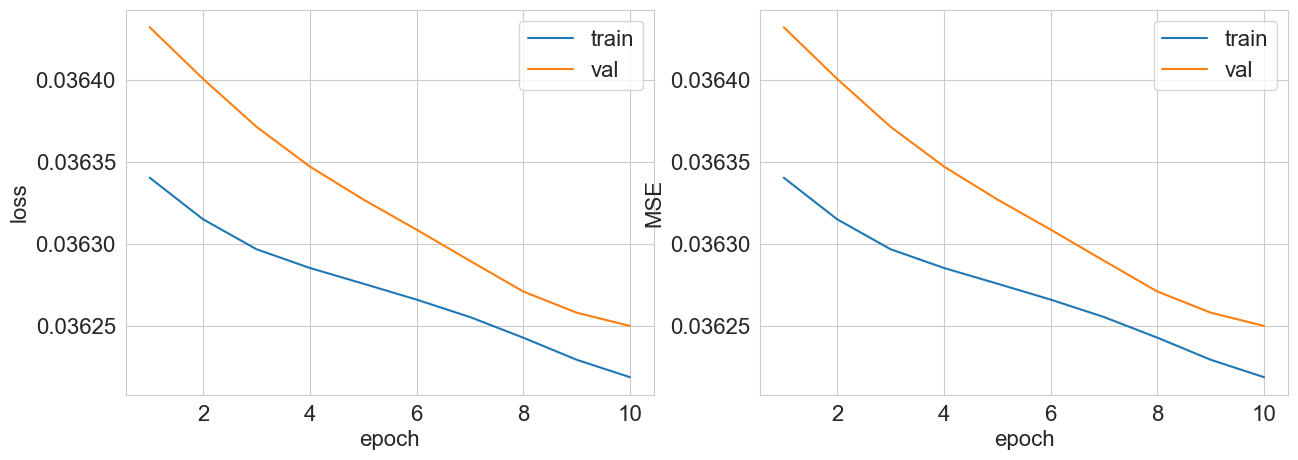

100%|██████████| 10/10 [00:56<00:00,  5.70s/it]

Validation MSE: 0.036


In [228]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-6) 
criterion = nn.MSELoss()

train_mse, val_mse = train_and_validate(
    model=model,
    optimizer=optimizer,
    criterion=criterion,
    metric=lambda pred, true: mse_metric(pred, true),
    train_loader=train_loader,
    val_loader=val_loader,
    num_epochs=10,
    verbose=True
)

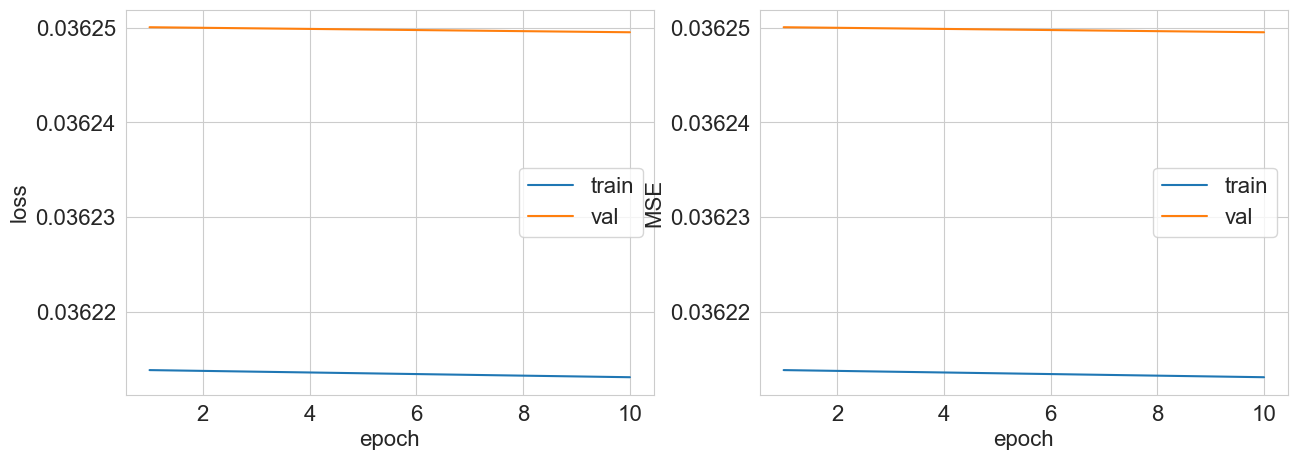

100%|██████████| 10/10 [00:56<00:00,  5.68s/it]

Validation MSE: 0.036


In [229]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-8) 
criterion = nn.MSELoss()

train_mse, val_mse = train_and_validate(
    model=model,
    optimizer=optimizer,
    criterion=criterion,
    metric=lambda pred, true: mse_metric(pred, true),
    train_loader=train_loader,
    val_loader=val_loader,
    num_epochs=10,
    verbose=True
)

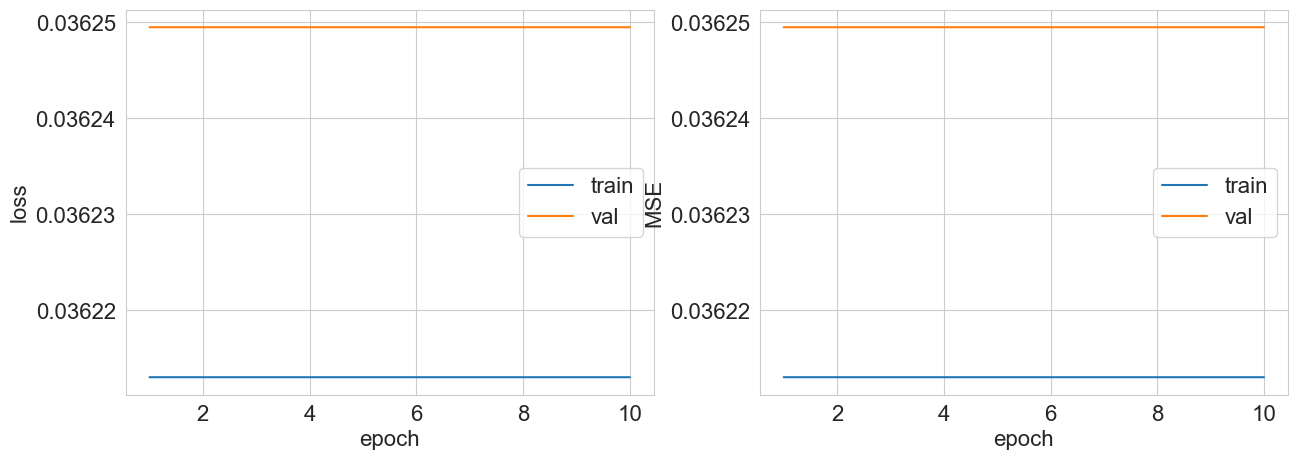

100%|██████████| 10/10 [00:56<00:00,  5.66s/it]

Validation MSE: 0.036


In [230]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-10) 
criterion = nn.MSELoss()

train_mse, val_mse = train_and_validate(
    model=model,
    optimizer=optimizer,
    criterion=criterion,
    metric=lambda pred, true: mse_metric(pred, true),
    train_loader=train_loader,
    val_loader=val_loader,
    num_epochs=10,
    verbose=True
)

**Задание 1.7 (0.5 балла).** Сравните результаты этого эксперимента с предыдущим запуском. 

**Ответ**\ 
Получаем слудцющий результат (чтобы легче было сравнивать, продублировала графики ниже рядом друг с другом) !Графики могут отличаться от того, что есть тк тетрадка запускалась несколько раз, но суть не меняется
1) lr=1e-6, epochs=10
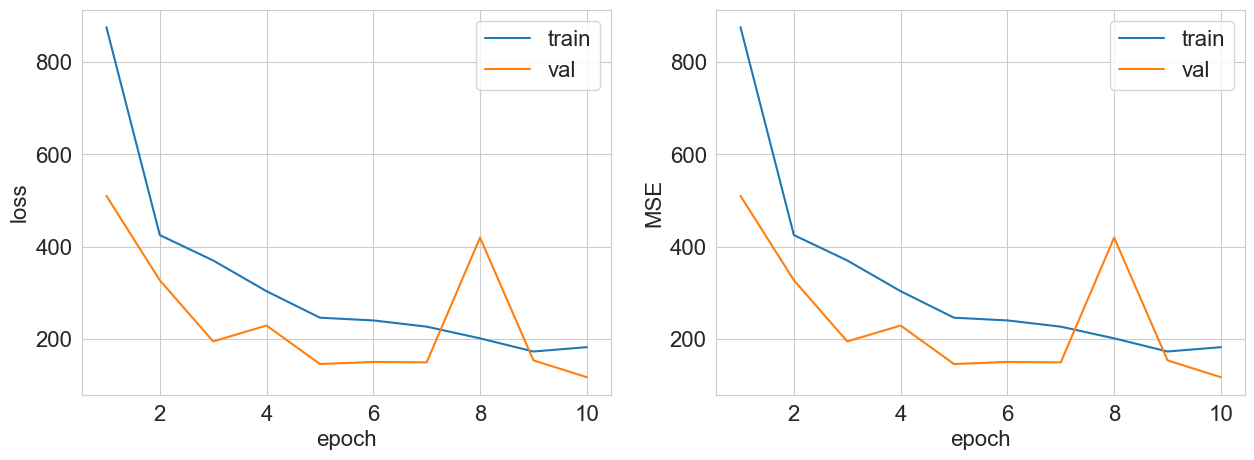
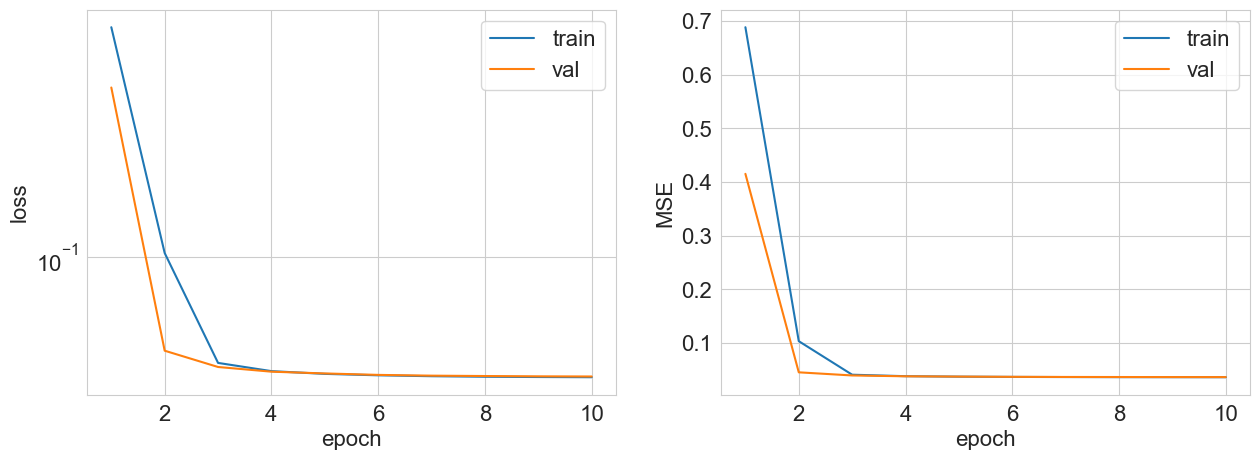
2) lr=1e-8, epochs=10
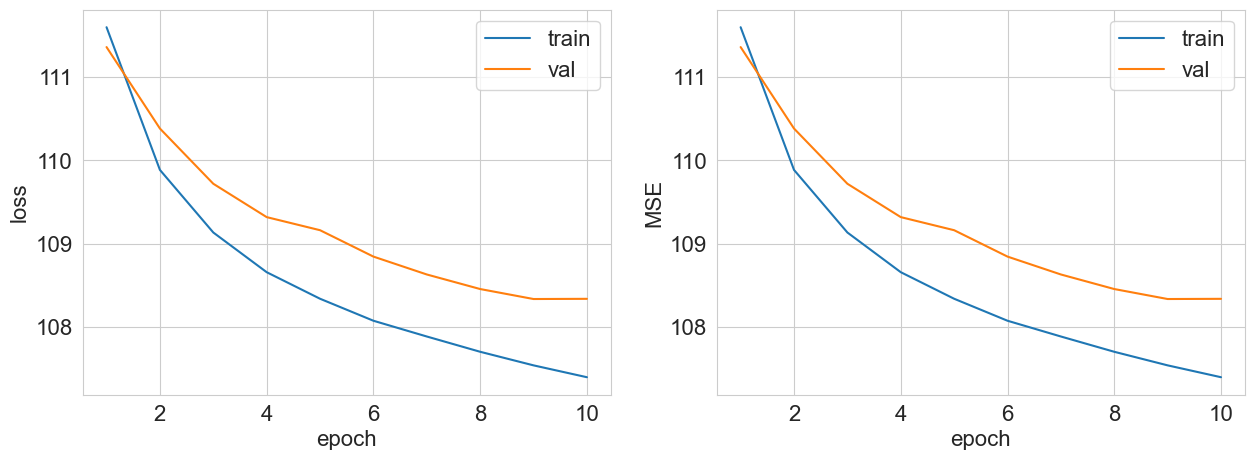
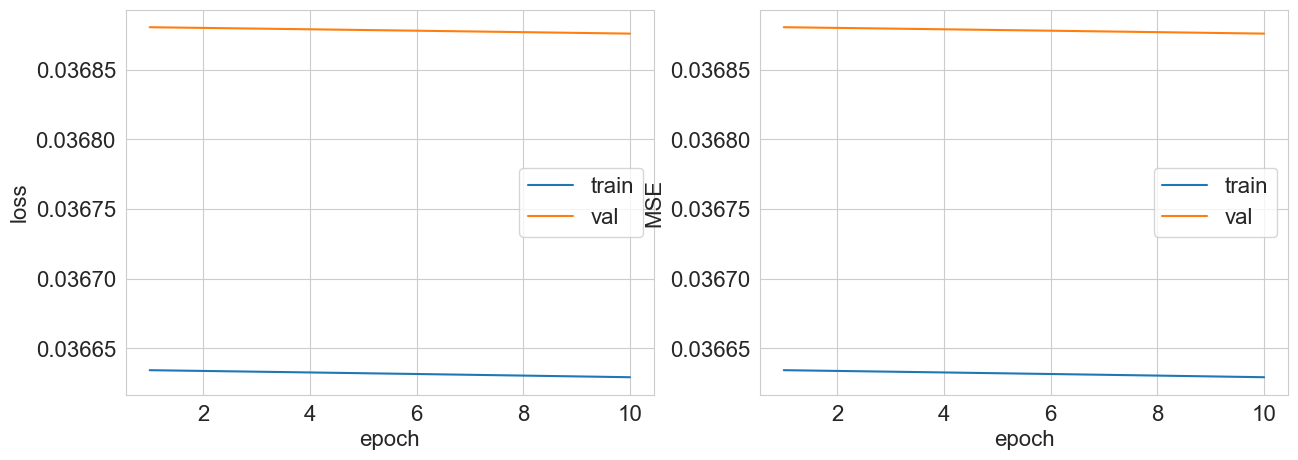
3) lr=1e-10, epochs=10
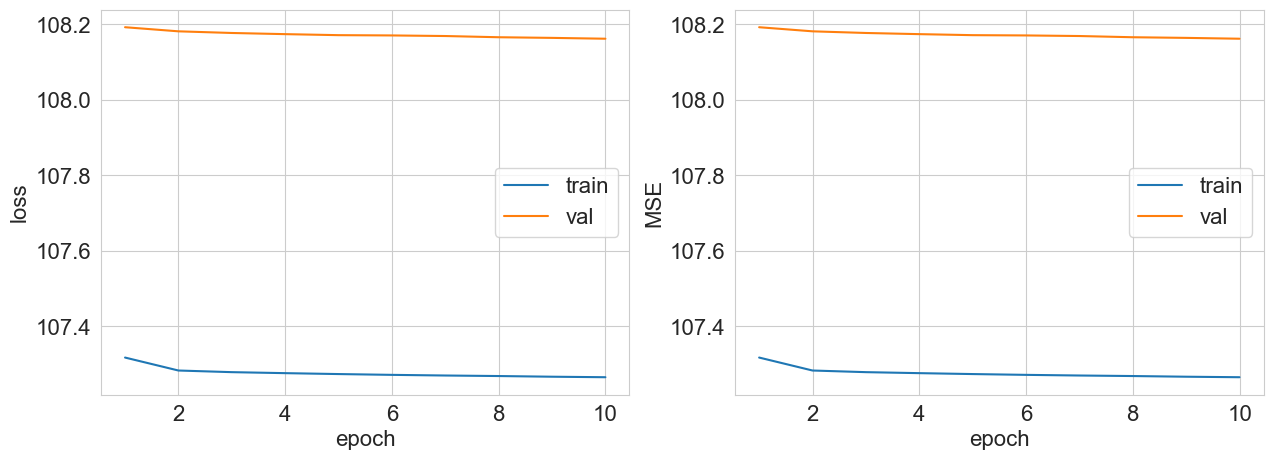
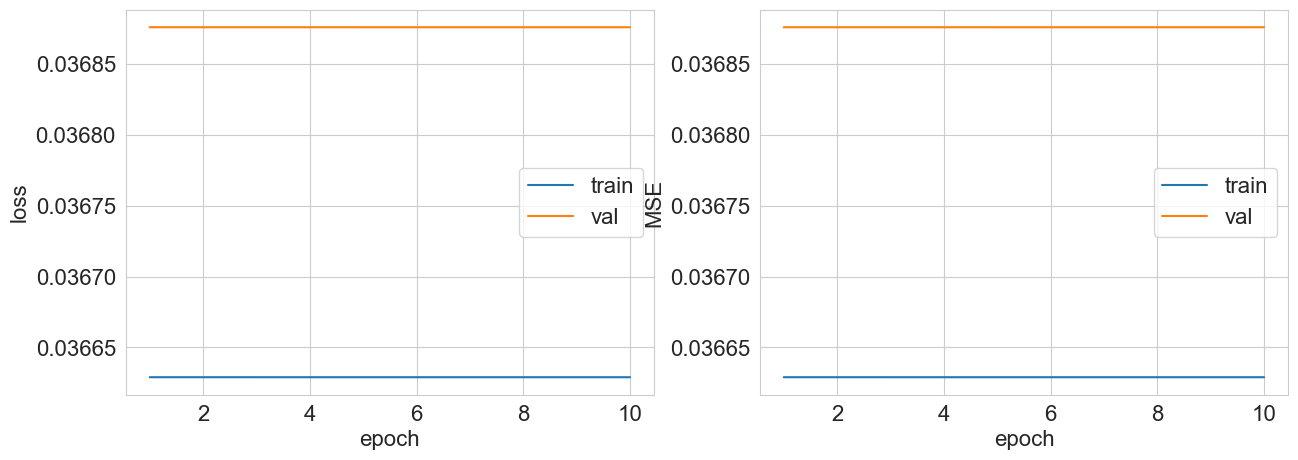


В теории, нормализация и сигмоидная активация должны были сделать обучение более стабильным тк значение целевой переменной и предсказаний ограничиваются диапазоном [0, 1]. И это можно увидеть на данных, где lr=1e-6. У нас перестали скакать var значения на графике функции потерь и MSE.\
Что касается графиков, где lr=1e-8 и lr=1e-10, то эти значения просто не подходят теперь (1e-10 и без нормализации не подходило), обучение практически остановилось\
\
Ну и везде значение MSE = 0.037 намного меньше благодаря нормализации целевой переменной.

**Задание 1.8 (0.75 балла).** На этот раз попробуем отнормировать не только целевую переменную, но и сами данные, которые подаются сети на вход. Для них будем использовать нормализацию через среднее и стандартное отклонение. Преобразуйте данные и повторите прошлый эксперимент. Скорее всего, имеет смысл увеличить число эпох обучения.

In [231]:
#Нормировка данных от 0 до 1, чтобы совпадало с целевой переменной 
def X_normalize(data, min_value=None, max_value=None):
    if min_value is None or max_value is None:
        min_value = data.min()
        max_value = data.max()
    return (data - min_value) / (max_value - min_value), min_value, max_value

In [232]:
X_train_normalize, X_min, X_max = X_normalize(X_train)
X_val_normalize, _, _ = X_normalize(X_val, X_min, X_max)

X_train_normalize

array([[0.17409649, 0.17399273, 0.17366704, ..., 0.17349196, 0.17562401,
        0.17333531],
       [0.17397451, 0.1741429 , 0.17298958, ..., 0.17375501, 0.17451114,
        0.17380018],
       [0.17406959, 0.17351549, 0.17335471, ..., 0.17365705, 0.17243125,
        0.17338615],
       ...,
       [0.17399375, 0.17205099, 0.17401816, ..., 0.1738519 , 0.17692865,
        0.17299622],
       [0.17396331, 0.17359679, 0.1734685 , ..., 0.17357981, 0.17417204,
        0.17358955],
       [0.17404729, 0.17376941, 0.17398433, ..., 0.17367308, 0.17354131,
        0.17356278]], shape=(289881, 90))

In [233]:
#Повторяем шаги из задания 1.6
y_train_normalize = normalize(y_train, min_value, max_value)
y_val_normalize = normalize(y_val, min_value, max_value)

X_train_tensor = torch.tensor(X_train_normalize, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_normalize, dtype=torch.float32).reshape(-1, 1)
X_val_tensor = torch.tensor(X_val_normalize, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_normalize, dtype=torch.float32).reshape(-1, 1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

model = NormalizedRegressor(input_size=X_train.shape[1], hidden_size=128)

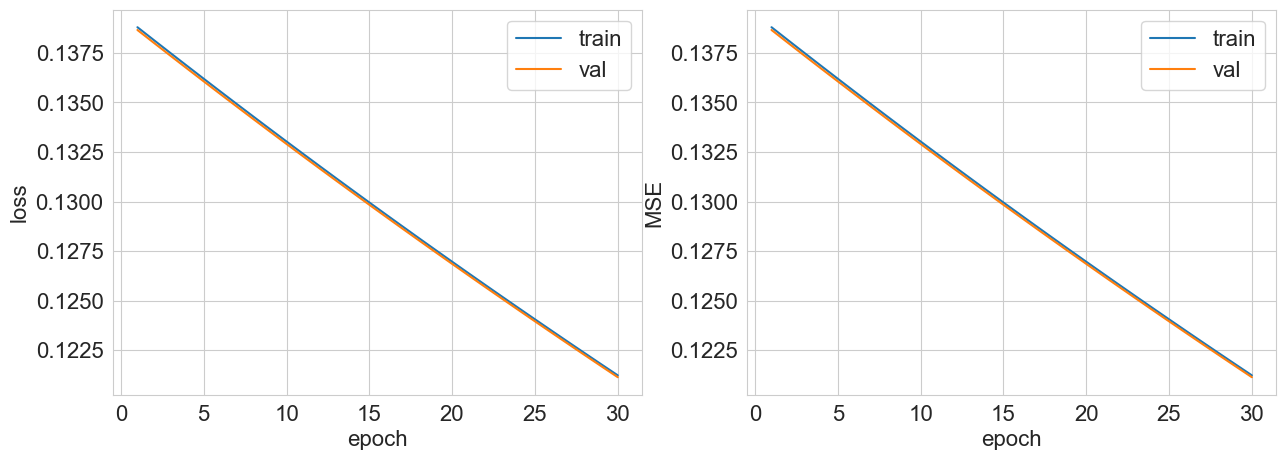

100%|██████████| 30/30 [02:47<00:00,  5.58s/it]

Validation MSE: 0.121


In [234]:
#Увеличим эпохи до 30
optimizer = torch.optim.SGD(model.parameters(), lr=1e-6) 
criterion = nn.MSELoss()

train_mse, val_mse = train_and_validate(
    model=model,
    optimizer=optimizer,
    criterion=criterion,
    metric=lambda pred, true: mse_metric(pred, true),
    train_loader=train_loader,
    val_loader=val_loader,
    num_epochs=30,
    verbose=True
)

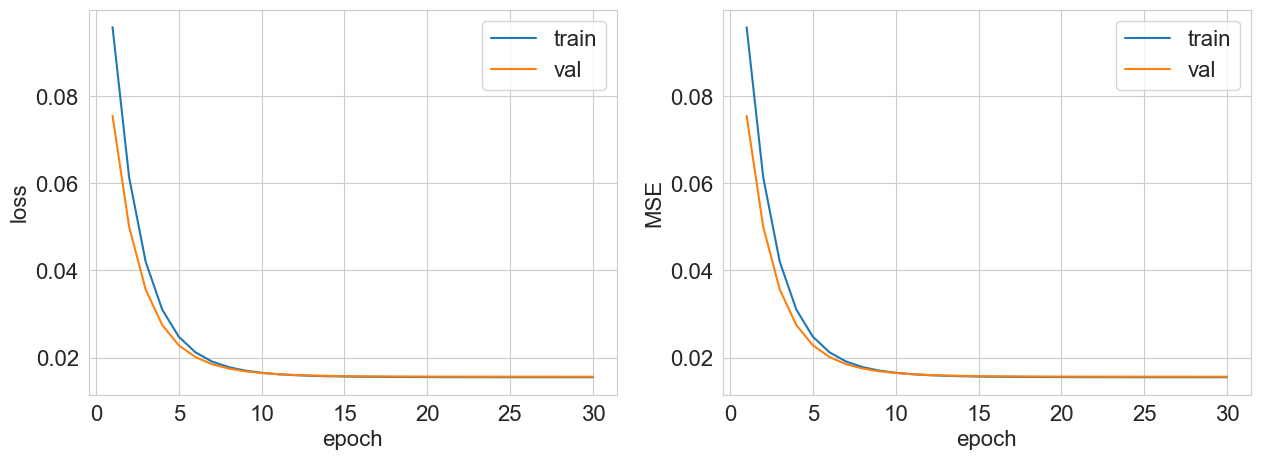

100%|██████████| 30/30 [02:48<00:00,  5.62s/it]

Validation MSE: 0.016


In [235]:
#Увеличим lr
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4) 
criterion = nn.MSELoss()

train_mse, val_mse = train_and_validate(
    model=model,
    optimizer=optimizer,
    criterion=criterion,
    metric=lambda pred, true: mse_metric(pred, true),
    train_loader=train_loader,
    val_loader=val_loader,
    num_epochs=30,
    verbose=True
)

lr=1e-10 и lr=1e-8 не имеет смысл даже рассматривать тк оно будет идентично lr=1e-6

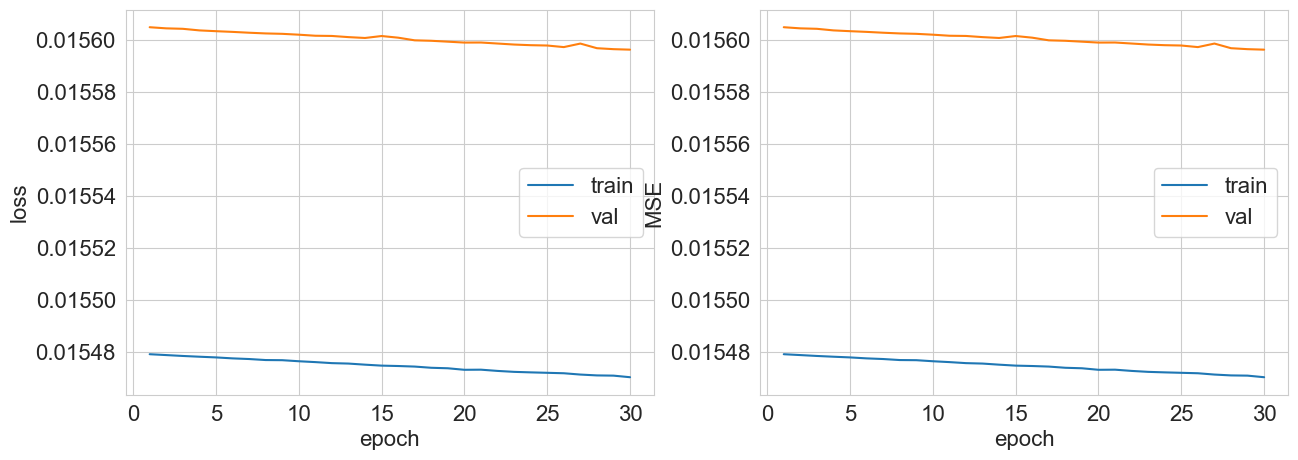

100%|██████████| 30/30 [02:52<00:00,  5.74s/it]

Validation MSE: 0.016


In [236]:
#Рассмотрим lr=1e-2, как в классификации 
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2) 
criterion = nn.MSELoss()

train_mse, val_mse = train_and_validate(
    model=model,
    optimizer=optimizer,
    criterion=criterion,
    metric=lambda pred, true: mse_metric(pred, true),
    train_loader=train_loader,
    val_loader=val_loader,
    num_epochs=30,
    verbose=True
)

Если вы все сделали правильно, то у вас должно было получиться качество, сравнимое с `Ridge` регрессией.

**Мораль:** как видите, нам пришлось сделать очень много хитрых телодвижений, чтобы нейронная сеть работала хотя бы так же, как и простая линейная модель. Здесь, конечно, показан совсем экстремальный случай, когда без нормализации данных нейронная сеть просто не учится. Как правило, в реальности завести нейронную сеть из коробки не очень сложно, но вот заставить ее работать на полную &mdash; куда более трудоемкая задача. Написание пайплайнов обучения нейросетевых моделей требует большой аккуратности, а дебаг часто превращается в угадайку. К счастью, очень часто на помощь приходит интуиция, и мы надеемся, что вы сможете выработать ее в течение нашего курса. Начнем с двух советов, которые стоит принять на вооружение:

- Обязательно начинаем любые эксперименты с бейзлайнов: без них мы бы не поняли, что нейронная сеть не учится в принципе.
- При постановке эксперментов старайтесь делать минимальное количество изменений за раз (в идеале одно!): только так можно понять, какие конкретно изменения влияют на результат.

## Часть 2. Улучшаем нейронную сеть (5 баллов)

Продолжим экспериментировать с нейронной сетью, чтобы добиться еще лучшего качества.

**Задание 2.1 (1 балл).** Давайте попробуем другие оптимизаторы. Обучите нейросеть с помощью SGD+momentum и Adam. Опишите свои наблюдения и в дальнейших запусках используйте лучший оптимизатор. Для Adam обычно берут learning rate поменьше, в районе $10^{-3}$.

Использовала
https://pytorch.org/docs/stable/optim.html?spm=a2ty_o01.29997173.0.0.93d1c921b99Bj8

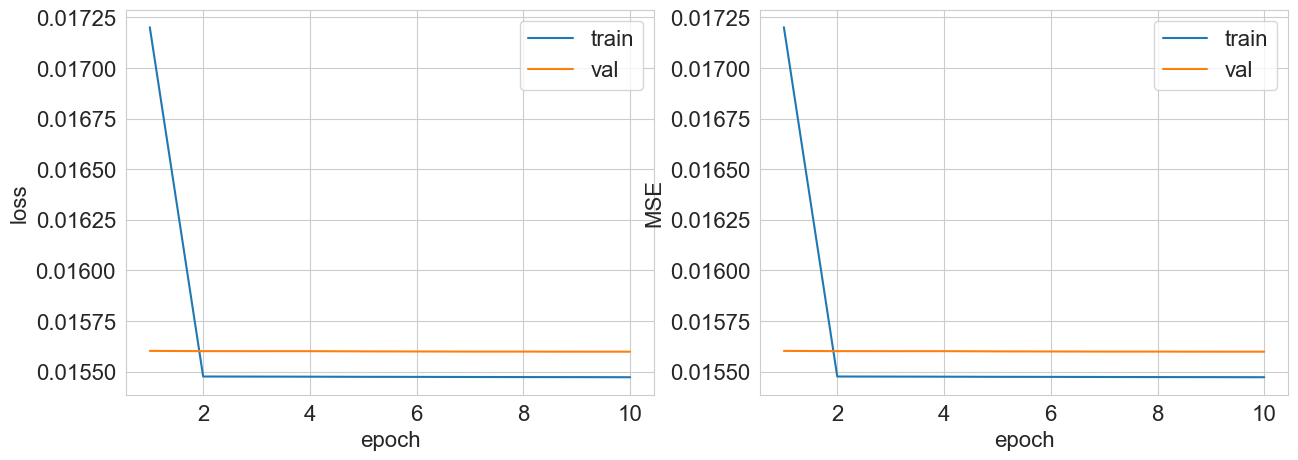

100%|██████████| 10/10 [01:02<00:00,  6.21s/it]

Validation MSE: 0.016


In [237]:
# SGD+momentum
model = NormalizedRegressor(input_size=X_train.shape[1], hidden_size=256)
optimizer_sgd = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)

# Обучение с SGD+momentum
criterion = nn.MSELoss()
train_mse_sgd, val_mse_sgd = train_and_validate(
    model=model,
    optimizer=optimizer_sgd,
    criterion=criterion,
    metric=lambda pred, true: mse_metric(pred, true),
    train_loader=train_loader,
    val_loader=val_loader,
    num_epochs=10,
    verbose=True
)

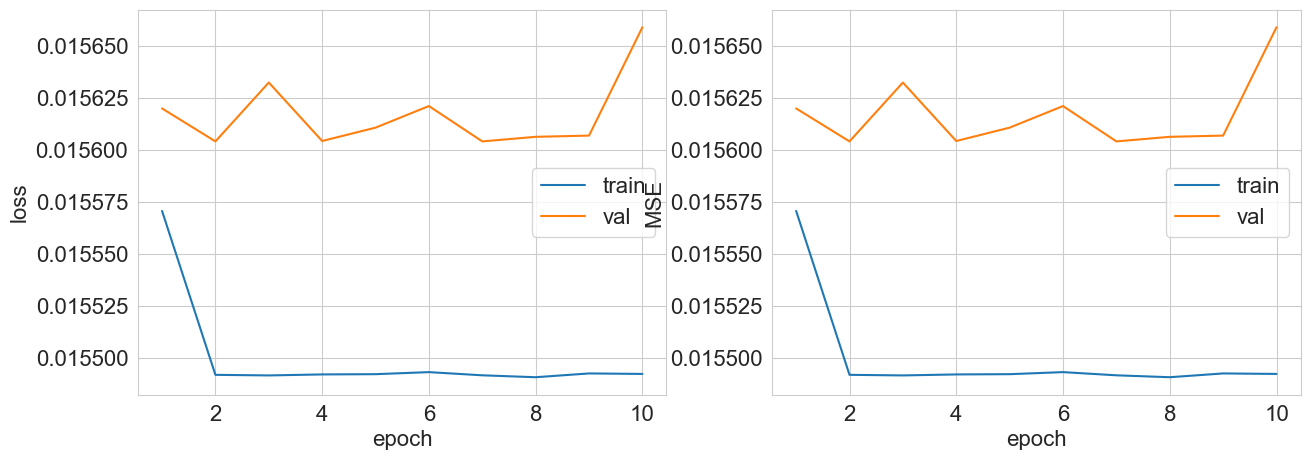

100%|██████████| 10/10 [01:16<00:00,  7.65s/it]

Validation MSE: 0.016


In [238]:
# Adam
optimizer_adam = torch.optim.Adam(model.parameters(), lr=1e-2)

# Обучение с Adam
criterion = nn.MSELoss()
train_mse_adam, val_mse_adam = train_and_validate(
    model=model,
    optimizer=optimizer_adam,
    criterion=criterion,
    metric=lambda pred, true: mse_metric(pred, true),
    train_loader=train_loader,
    val_loader=val_loader,
    num_epochs=10,
    verbose=True
)

SGD+momentum лучше

**Задание 2.2 (1 балл).** Теперь сделаем нашу нейронную сеть более сложной. Попробуйте сделать сеть:

- более широкой (то есть увеличить размерность скрытого слоя, например, вдвое)
- более глубокой (то есть добавить еще один скрытый слой)

Опишите, как увеличение числа параметров модели влияет на качество на обучающей и валидационной выборках.

In [239]:
# Более широкая сеть
class WideRegressor(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(WideRegressor, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size * 2)  # Увеличиваем размерность
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size * 2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

In [240]:
#Более глубокая сеть
class DeepRegressor(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(DeepRegressor, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)  # Второй скрытый слой
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.sigmoid(out)
        return out

In [241]:
# Определение моделей
wide_model = WideRegressor(input_size=X_train.shape[1], hidden_size=128)
deep_model = DeepRegressor(input_size=X_train.shape[1], hidden_size=128)

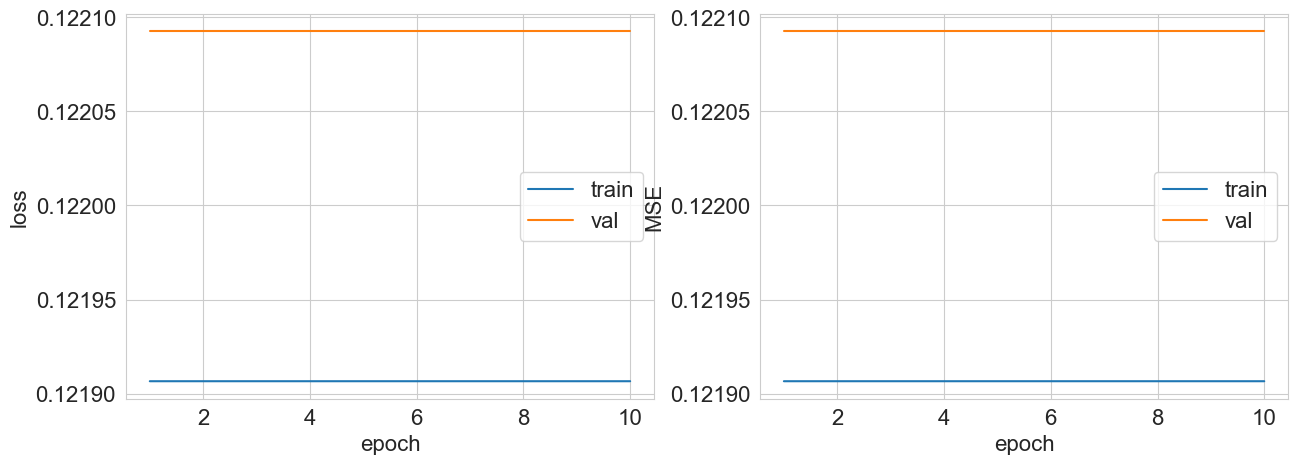

100%|██████████| 10/10 [00:55<00:00,  5.54s/it]

Validation MSE: 0.122


In [242]:
# SGD+momentum
optimizer_sgd = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

# Обучение более широкой модели
train_mse_wide, val_mse_wide = train_and_validate(
    model=wide_model,
    optimizer=optimizer_sgd,
    criterion=criterion,
    metric=lambda pred, true: mse_metric(pred, true),
    train_loader=train_loader,
    val_loader=val_loader,
    num_epochs=10,
    verbose=True
)

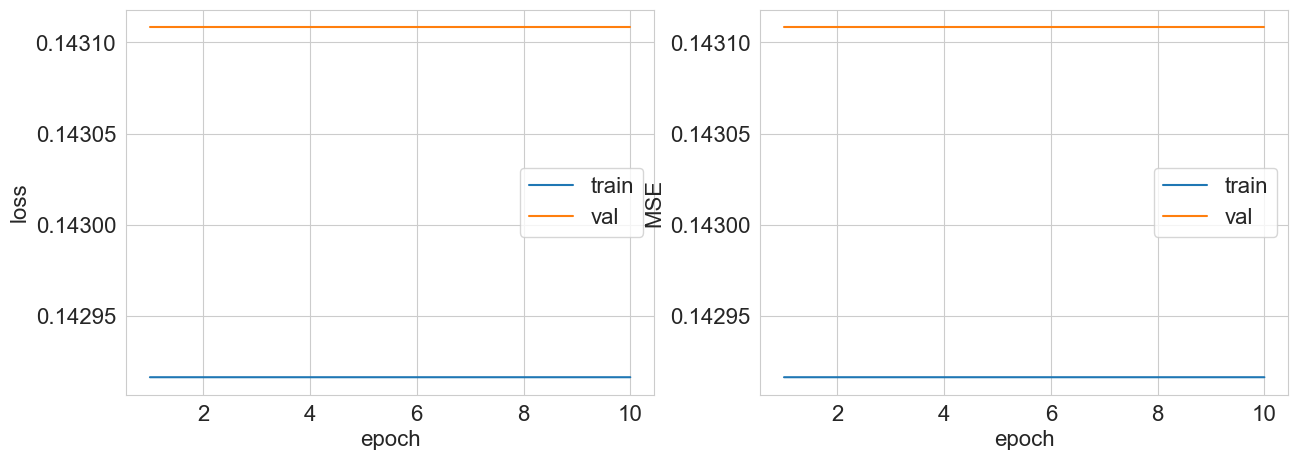

100%|██████████| 10/10 [01:02<00:00,  6.29s/it]

Validation MSE: 0.143


In [243]:
# SGD+momentum
optimizer_sgd = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)

# Обучение более глубокой модели
train_mse_deep, val_mse_deep = train_and_validate(
    model=deep_model,
    optimizer=optimizer_sgd,
    criterion=criterion,
    metric=lambda pred, true: mse_metric(pred, true),
    train_loader=train_loader,
    val_loader=val_loader,
    num_epochs=10,
    verbose=True
)

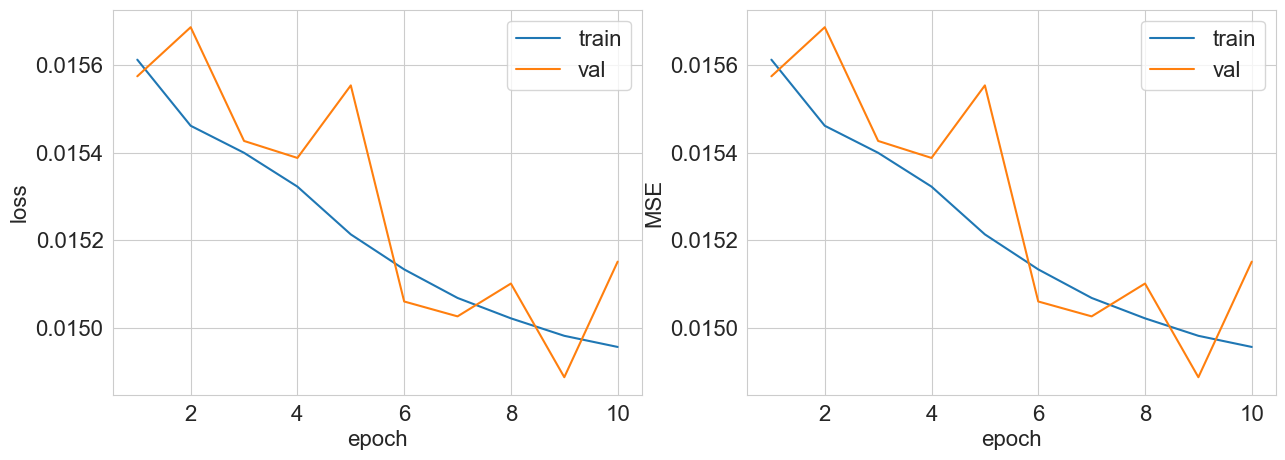

100%|██████████| 10/10 [01:14<00:00,  7.48s/it]

Validation MSE: 0.015


In [244]:
# Adam
optimizer_adam_wide = torch.optim.Adam(wide_model.parameters(), lr=1e-3)

# Обучение более широкой модели
train_mse_wide, val_mse_wide = train_and_validate(
    model=wide_model,
    optimizer=optimizer_adam_wide,
    criterion=criterion,
    metric=lambda pred, true: mse_metric(pred, true),
    train_loader=train_loader,
    val_loader=val_loader,
    num_epochs=10,
    verbose=True
)

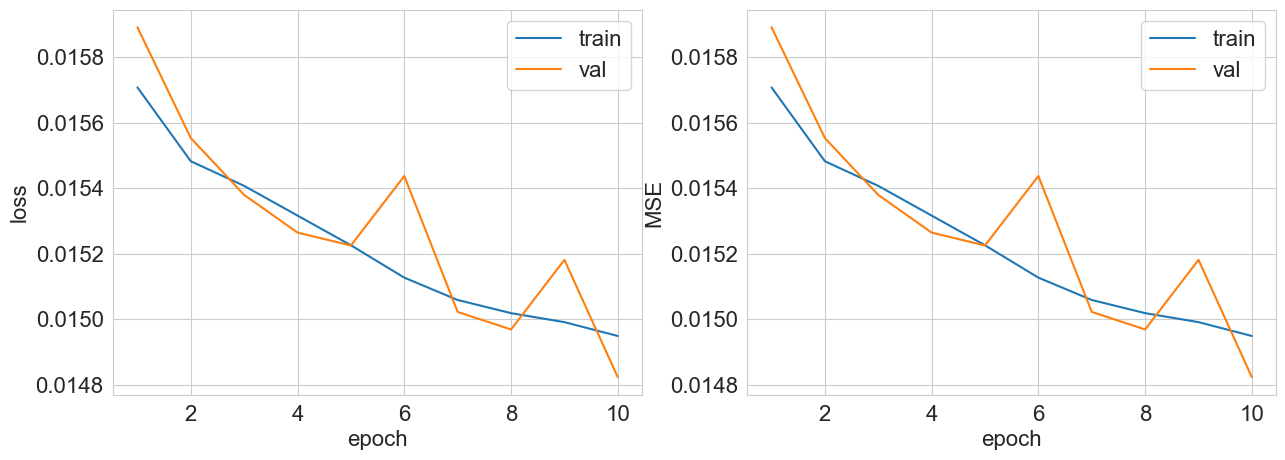

100%|██████████| 10/10 [01:29<00:00,  9.00s/it]

Validation MSE: 0.015


In [245]:
# Adam
optimizer_adam_deep = torch.optim.Adam(deep_model.parameters(), lr=1e-3)

# Обучение более глубокой модели
train_mse_deep, val_mse_deep = train_and_validate(
    model=deep_model,
    optimizer=optimizer_adam_deep,
    criterion=criterion,
    metric=lambda pred, true: mse_metric(pred, true),
    train_loader=train_loader,
    val_loader=val_loader,
    num_epochs=10,
    verbose=True
)

In [246]:
#Объединение более широкой и более глубокой 
class FlexibleRegressor(nn.Module):
    def __init__(self, input_size, hidden_size, depth=2, width_multiplier=1):
        super(FlexibleRegressor, self).__init__()
        hidden_dim = int(hidden_size * width_multiplier)
        
        layers = []
        layers.append(nn.Linear(input_size, hidden_dim))
        layers.append(nn.ReLU())
        
        for _ in range(depth - 1):
            layers.append(nn.Linear(hidden_dim, hidden_dim))
            layers.append(nn.ReLU())
        
        layers.append(nn.Linear(hidden_dim, 1))
        layers.append(nn.Sigmoid())
        

        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

посмотрим все с Adam дальше тк там просто графики интереснее

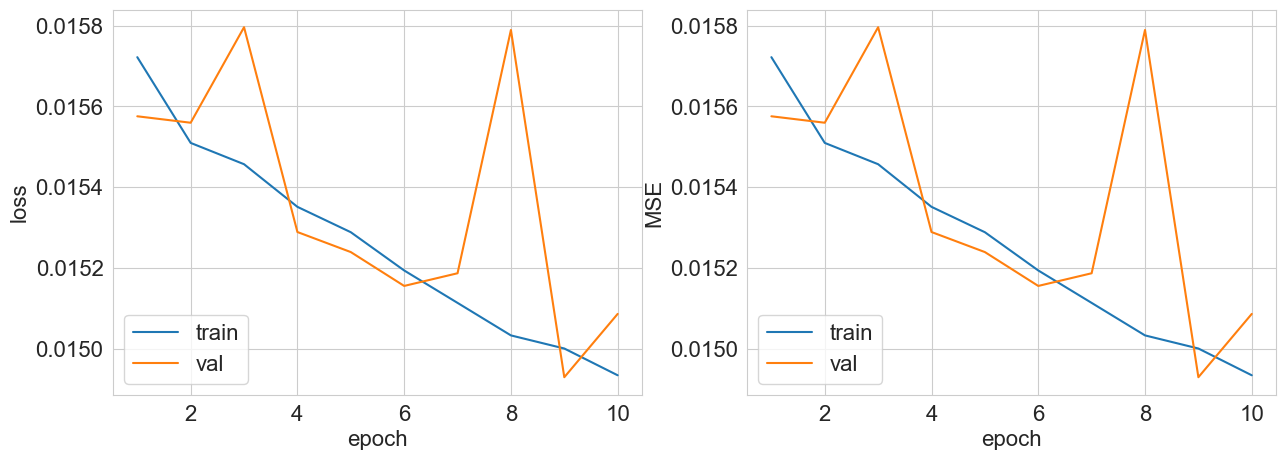

100%|██████████| 10/10 [02:14<00:00, 13.45s/it]

Validation MSE: 0.015


In [247]:
combined_model = FlexibleRegressor(input_size=X_train.shape[1], hidden_size=128, depth=3, width_multiplier=2)

# Adam
optimizer_adam_deep = torch.optim.Adam(combined_model.parameters(), lr=1e-3)
criterion = nn.MSELoss()

train_mse_deep, val_mse_deep = train_and_validate(
    model=combined_model,
    optimizer=optimizer_adam_deep,
    criterion=criterion,
    metric=lambda pred, true: mse_metric(pred, true),
    train_loader=train_loader,
    val_loader=val_loader,
    num_epochs=10,
    verbose=True
)

Более широкая сеть показывает лучший баланс между качеством и риском переобучение. Объединение моделей не дает улучшений

**Задание 2.3 (1 балл).** Как вы должны были заметить, более сложная модель стала сильнее переобучаться. Попробуем добавить в обучение регуляризацию, чтобы бороться с переобучением. Добавьте слой дропаута ([`nn.Dropout`](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html#torch.nn.Dropout)) с параметром $p=0.2$ после каждого линейного слоя, кроме последнего. Почитать про дропаут можете в следующем [блогпосте](https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5) или в оригинальной [статье](https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)

Опишите результаты. 

In [248]:
class RegularizedRegressor(nn.Module):
    def __init__(self, input_size, hidden_size, depth=2, width_multiplier=1, dropout_prob=0.2):
        super(RegularizedRegressor, self).__init__()
        hidden_dim = int(hidden_size * width_multiplier)
        
        layers = []
        layers.append(nn.Linear(input_size, hidden_dim))
        layers.append(nn.ReLU())
        layers.append(nn.Dropout(dropout_prob))  # Добавляем Dropout
        
        for _ in range(depth - 1):
            layers.append(nn.Linear(hidden_dim, hidden_dim))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_prob))  # добавляем Dropout
        
        layers.append(nn.Linear(hidden_dim, 1))
        layers.append(nn.Sigmoid())  #Последний слой без Dropout

        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

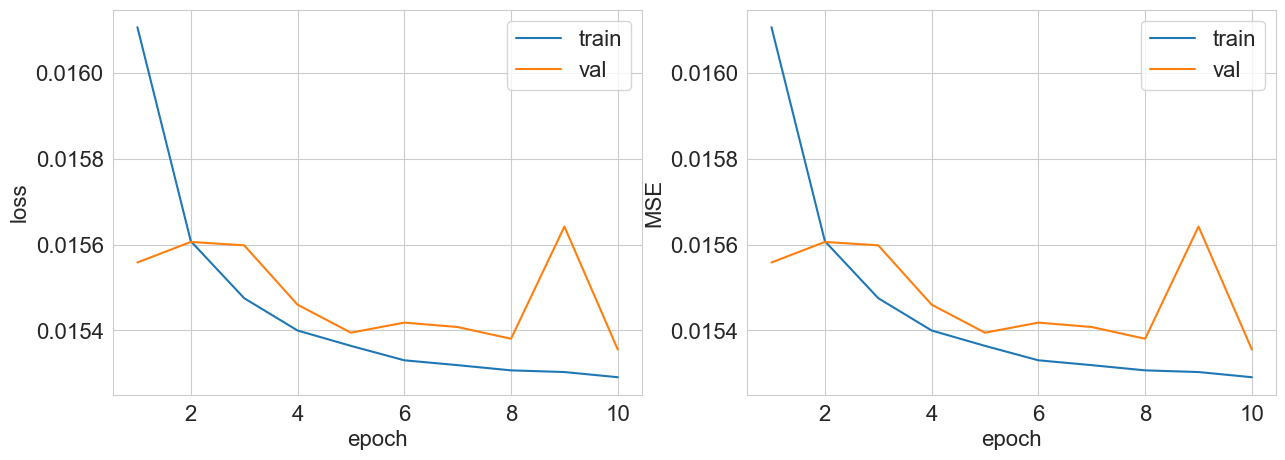

100%|██████████| 10/10 [01:15<00:00,  7.50s/it]

Validation MSE: 0.015


In [249]:
model = RegularizedRegressor(input_size=X_train.shape[1], hidden_size=128, depth=1, width_multiplier=1, dropout_prob=0.3)

# Оптимизатор Adam
optimizer_adam = torch.optim.Adam(model.parameters(), lr=1e-3)

# Обучение модели
train_mse_dropout, val_mse_dropout = train_and_validate(
    model=model,
    optimizer=optimizer_adam,
    criterion=criterion,
    metric=lambda pred, true: mse_metric(pred, true),
    train_loader=train_loader,
    val_loader=val_loader,
    num_epochs=10,
    verbose=True
)

Модель демонстрирует небольшое переобучение (MSE и потери начинают расти после 6-й эпохи), поэтому изменим пару параметров

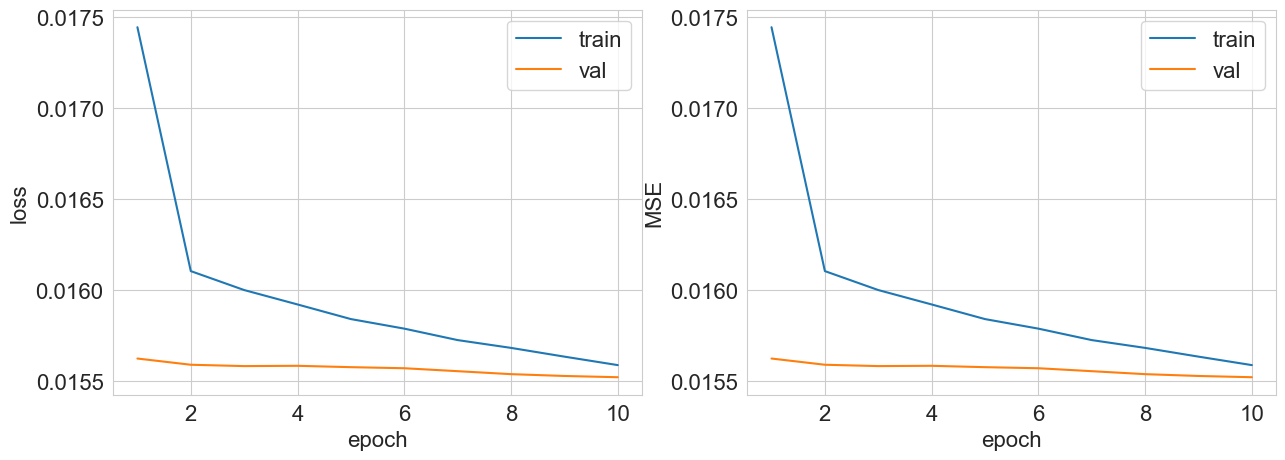

100%|██████████| 10/10 [01:15<00:00,  7.58s/it]

Validation MSE: 0.016


In [250]:
model = RegularizedRegressor(input_size=X_train.shape[1], hidden_size=128, depth=1, width_multiplier=1, dropout_prob=0.4)#Изменила dropout_prob
optimizer_adam = torch.optim.Adam(model.parameters(), lr=1e-4) #Изменила lr

train_mse_dropout, val_mse_dropout = train_and_validate(
    model=model,
    optimizer=optimizer_adam,
    criterion=criterion,
    metric=lambda pred, true: mse_metric(pred, true),
    train_loader=train_loader,
    val_loader=val_loader,
    num_epochs=10,
    verbose=True
)

Добавление Dropout и снижение learning rate существенно улучшили качество модели на валидации. Теперь модель показывает стабильное обучение

**Задание 2.4 (1.5 балла).** Теперь, когда мы определились с выбором архитектуры нейронной сети, пора заняться рутиной DL-инженера &mdash; перебором гиперпараметров. Подберите оптимальное значение lr по значению MSE на валидации (по логарифмической сетке, достаточно посмотреть 3-4 значения), можете воспользоваться `verbose=False` в функции `train_and_validate`.

Также подберем оптимальное значение параметра weight decay для данного lr. Weight decay &mdash; это аналог L2-регуляризации для нейронных сетей. Почитать о нем можно, например, [здесь](https://paperswithcode.com/method/weight-decay). В PyTorch он задается как параметр оптимизатора `weight_decay`. Подберите оптимальное значение weight decay по логарифимической сетке (его типичные значения лежат в диапазоне $[10^{-6}, 10^{-3}]$, но не забудьте включить нулевое значение в сетку).

Постройте графики зависимости MSE на трейне и на валидации от значений параметров. Прокомментируйте получившиеся зависимости.

In [251]:
# для перебора
lr_values = [1e-5, 1e-4, 1e-3]
weight_decay_values = [0, 1e-6, 1e-5, 1e-4, 1e-3]

train_mse_lr = []
val_mse_lr = []
results = {}

for lr in lr_values:
    for wd in weight_decay_values:
        print(f"Training with lr={lr}, weight_decay={wd}")
        
        model = RegularizedRegressor(input_size=X_train.shape[1], hidden_size=128, depth=1, width_multiplier=1, dropout_prob=0.4)
        optimizer_adam = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=wd)
        
        # Обучение модели
        train_mse, val_mse = train_and_validate(
            model=model,
            optimizer=optimizer_adam,
            criterion=criterion,
            metric=lambda pred, true: mse_metric(pred, true),
            train_loader=train_loader,
            val_loader=val_loader,
            num_epochs=10,
            verbose=False
        )
        results[(lr, wd)] = (train_mse, val_mse)

# Поиск наилучших гиперпараметров
best_params = min(results, key=lambda x: results[x][1])  
best_train_mse, best_val_mse = results[best_params]

print(f"Best parameters: lr={best_params[0]}, weight_decay={best_params[1]}")
print(f"Best Validation MSE: {best_val_mse:.5f}")

Training with lr=1e-05, weight_decay=0


100%|██████████| 10/10 [01:14<00:00,  7.42s/it]


Training with lr=1e-05, weight_decay=1e-06


100%|██████████| 10/10 [01:15<00:00,  7.55s/it]


Training with lr=1e-05, weight_decay=1e-05


100%|██████████| 10/10 [01:14<00:00,  7.41s/it]


Training with lr=1e-05, weight_decay=0.0001


100%|██████████| 10/10 [01:14<00:00,  7.42s/it]


Training with lr=1e-05, weight_decay=0.001


100%|██████████| 10/10 [01:13<00:00,  7.35s/it]


Training with lr=0.0001, weight_decay=0


100%|██████████| 10/10 [01:12<00:00,  7.30s/it]


Training with lr=0.0001, weight_decay=1e-06


100%|██████████| 10/10 [01:14<00:00,  7.44s/it]


Training with lr=0.0001, weight_decay=1e-05


100%|██████████| 10/10 [01:14<00:00,  7.50s/it]


Training with lr=0.0001, weight_decay=0.0001


100%|██████████| 10/10 [01:14<00:00,  7.42s/it]


Training with lr=0.0001, weight_decay=0.001


100%|██████████| 10/10 [01:14<00:00,  7.42s/it]


Training with lr=0.001, weight_decay=0


100%|██████████| 10/10 [01:13<00:00,  7.33s/it]


Training with lr=0.001, weight_decay=1e-06


100%|██████████| 10/10 [01:14<00:00,  7.46s/it]


Training with lr=0.001, weight_decay=1e-05


100%|██████████| 10/10 [01:14<00:00,  7.41s/it]


Training with lr=0.001, weight_decay=0.0001


100%|██████████| 10/10 [01:14<00:00,  7.41s/it]


Training with lr=0.001, weight_decay=0.001


100%|██████████| 10/10 [01:14<00:00,  7.41s/it]

Best parameters: lr=0.001, weight_decay=0
Best Validation MSE: 0.01546


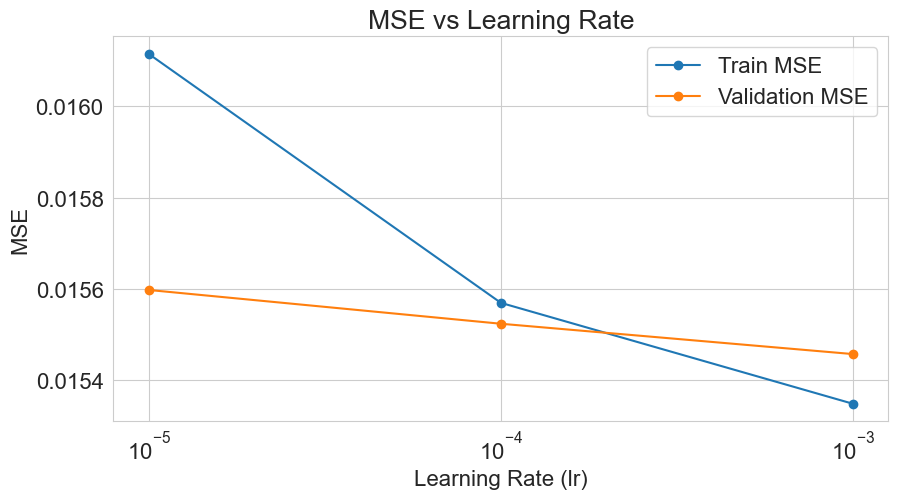

In [252]:
lr_results = {}
for lr, wd in results:
    if wd == 0:  
        lr_results[lr] = results[(lr, wd)]

# Построение графиков
plt.figure(figsize=(10, 5))
plt.plot(list(lr_results.keys()), [lr_results[lr][0] for lr in lr_results], label="Train MSE", marker="o")
plt.plot(list(lr_results.keys()), [lr_results[lr][1] for lr in lr_results], label="Validation MSE", marker="o")
plt.xscale("log")
plt.xlabel("Learning Rate (lr)")
plt.ylabel("MSE")
plt.legend()
plt.title("MSE vs Learning Rate")
plt.show()

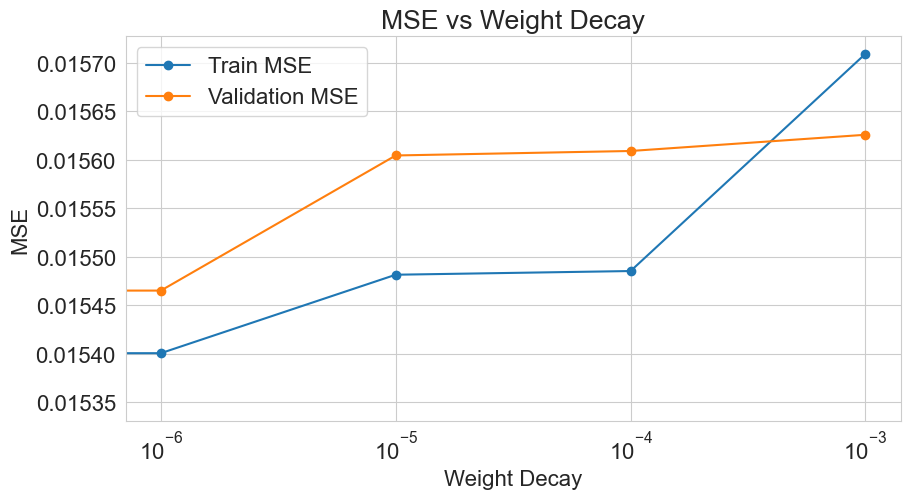

In [253]:
wd_results = {}
for lr, wd in results:
    if lr == best_params[0]:  
        wd_results[wd] = results[(lr, wd)]

# Построение графиков
plt.figure(figsize=(10, 5))
plt.plot(list(wd_results.keys()), [wd_results[wd][0] for wd in wd_results], label="Train MSE", marker="o")
plt.plot(list(wd_results.keys()), [wd_results[wd][1] for wd in wd_results], label="Validation MSE", marker="o")
plt.xscale("log")
plt.xlabel("Weight Decay")
plt.ylabel("MSE")
plt.legend()
plt.title("MSE vs Weight Decay")
plt.show()

Оптимальный lr находится в диапазоне [$10^{-4}, 10^{-3}$]\
Оптимальное значение weight_decay находится в диапазоне  [$10^{-6}, 10^{-4}$]
 

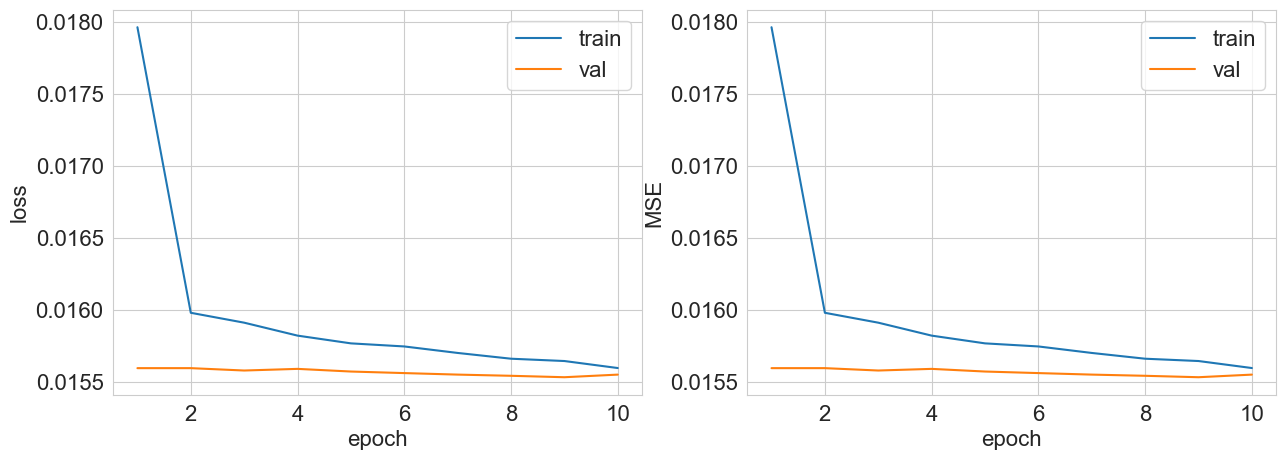

100%|██████████| 10/10 [01:16<00:00,  7.63s/it]

Validation MSE: 0.016


In [254]:
model = RegularizedRegressor(input_size=X_train.shape[1], hidden_size=128, depth=1, width_multiplier=1, dropout_prob=0.4)
optimizer_adam = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5) 

train_mse_dropout, val_mse_dropout = train_and_validate(
    model=model,
    optimizer=optimizer_adam,
    criterion=criterion,
    metric=lambda pred, true: mse_metric(pred, true),
    train_loader=train_loader,
    val_loader=val_loader,
    num_epochs=10,
    verbose=True
)

Как вы могли заметить, еще одна рутина DL-инженера &mdash; утомительное ожидание обучения моделей.

**Задание 2.5 (0.5 балла).** Мы провели большое число экспериментов и подобрали оптимальную архитектуру и гиперпараметры. Пришло время обучить модель на полной обучающей выборке, померять качество на тестовой выборке и сравнить с бейзлайнами. Проделайте это. 

In [ ]:
#Полная выборка
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

train_size = int(0.75 * X.shape[0])
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]
X_train.shape, X_test.shape

((386508, 90), (128837, 90))

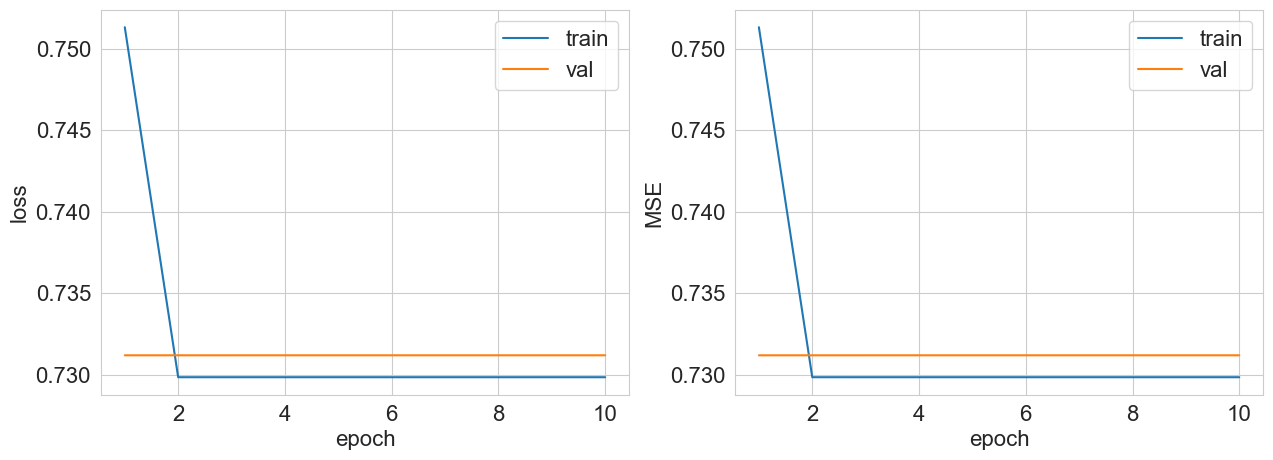

100%|██████████| 10/10 [01:43<00:00, 10.32s/it]

Validation MSE: 0.731


In [ ]:
unique_years = np.unique(np.concatenate([y_train, y_val]))
year_to_class = {year: idx for idx, year in enumerate(unique_years)}

y_train = np.array([year_to_class[year] for year in y_train])
y_test = np.array([year_to_class[year] for year in y_test])

X_train_normalize, X_min, X_max = X_normalize(X_train)
X_test_normalize, _, _ = X_normalize(X_test, X_min, X_max)

y_train_normalize = normalize(y_train, min_value, max_value)
y_test_normalize = normalize(y_test, min_value, max_value)

X_train_tensor = torch.tensor(X_train_normalize, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_normalize, dtype=torch.float32).reshape(-1, 1)
X_test_tensor = torch.tensor(X_test_normalize, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_normalize, dtype=torch.float32).reshape(-1, 1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

model = RegularizedRegressor(input_size=X_train.shape[1], hidden_size=128, depth=1, width_multiplier=1, dropout_prob=0.4)
optimizer_adam = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5) 

train_mse_dropout, val_mse_dropout = train_and_validate(
    model=model,
    optimizer=optimizer_adam,
    criterion=criterion,
    metric=lambda pred, true: mse_metric(pred, true),
    train_loader=train_loader,
    val_loader=test_loader,
    num_epochs=10,
    verbose=True
)

Модель обучается стабильно и показывает неплохой результат

Использование генеративных моделей допустимо на следующих условиях:
- Количество кода, написанное генеративными моделями, не превышает 30%
- Указана модель, использованная для генерации, а также промпт
- В конце работы необходимо описать свой опыт использования генеративного ИИ для решения данного домашнего задания. Укажите как часто Вам приходилось исправлять код своими руками или просить модель что-то исправить. Было ли это быстрее, чем написать код самим? 

Я использовала ИИ в основном, чтобы понять уже готовый код из дз и исправить проблемы с настройкой библиотек тк делала локально + иногда просила подобрать параметры. (У меня не хотела работать часть кода из функции `train_and_validate` из-за проблем с `tqdm.notebook`). Ну и сложно было только в начале, потом код +- не менялся почти